### Movie Data Set Data Science Workflow Demo



1.   Frame the Problem
2.   Gather the Data
3.   EDA - Exploratory Data Analysis
      * Feature Engineering
4.   Communicate Findings



In [41]:
# Dependencies
import pandas as pd
import datetime as dt
import matplotlib.pyplot as plt

In [32]:
# Notes from EDA
# some movies do not have budget data
# 'Paranormal Activity' has highest ROI of 7000%, followed by Blair Witch Project (2500%)

#### Dataset contains historical movies
* This analysis is for movie publishing companies (Netflix) to identify the types of movies that are popular (high number of votes and scores), as well as generates high return on investment
* Highest gross movie

In [47]:
# Import the CSV
df=pd.read_csv('/content/movies_data.csv', encoding='latin_1')
df['released']=pd.to_datetime(df['released'])
df.head()

,budget,company,country,director,genre,gross,name,rating,released,runtime,score,star,votes,writer,year
0,8000000.0,Columbia Pictures Corporation,USA,Rob Reiner,Adventure,52287414.0,Stand by Me,R,1986-08-22,89,8.1,Wil Wheaton,299174,Stephen King,1986
1,6000000.0,Paramount Pictures,USA,John Hughes,Comedy,70136369.0,Ferris Bueller's Day Off,PG-13,1986-06-11,103,7.8,Matthew Broderick,264740,John Hughes,1986
2,15000000.0,Paramount Pictures,USA,Tony Scott,Action,179800601.0,Top Gun,PG,1986-05-16,110,6.9,Tom Cruise,236909,Jim Cash,1986
3,18500000.0,Twentieth Century Fox Film Corporation,USA,James Cameron,Action,85160248.0,Aliens,R,1986-07-18,137,8.4,Sigourney Weaver,540152,James Cameron,1986
4,9000000.0,Walt Disney Pictures,USA,Randal Kleiser,Adventure,18564613.0,Flight of the Navigator,PG,1986-08-01,90,6.9,Joey Cramer,36636,Mark H. Baker,1986


In [8]:
# EDA
print(f'This Data contains {len(df)} movies')

This Data contains 6820 movies


In [19]:
# Create a year column
df.loc[:, 'year']=df.loc[:, 'released'].dt.to_period('Y')

In [50]:
# Create a ROI column
df.loc[:, 'ROI']=df.loc[:, 'gross']/df.loc[:, 'budget']
df.loc[:, ['ROI', 'budget', 'gross', 'year', 'name']]
# Remove columns with no budget data
filter_df=df.loc[:, 'budget']!=0
clean_df=df.loc[filter_df, :]

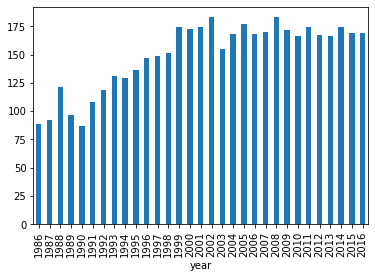

In [51]:
# Movie release trend (X = time and y = movie_count)
clean_df.groupby('year')['name'].count().plot(kind='bar') # assumes kind='line'

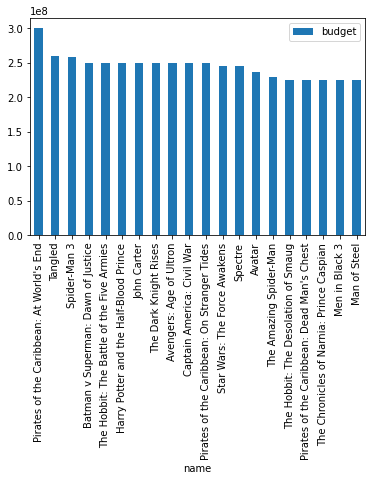

In [52]:
# Find the movie with the highest budget
highest_budget_df=clean_df.loc[: , ['name', 'budget']].sort_values('budget', ascending=False).head(20)
highest_budget_df.plot(kind='bar', x='name')

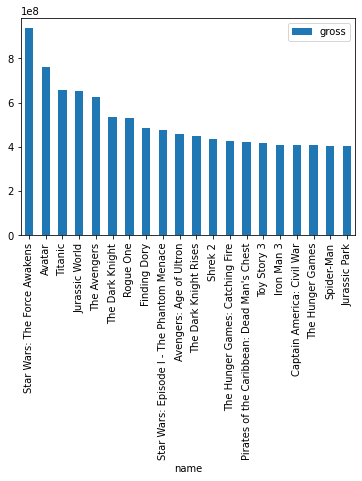

,name,gross,ROI
6380,Star Wars: The Force Awakens,936662225.0,3.823111
5061,Avatar,760507625.0,3.208893
2420,Titanic,658672302.0,3.293362
6391,Jurassic World,652270625.0,4.348471
5723,The Avengers,623357910.0,2.833445
4840,The Dark Knight,534858444.0,2.891127
6614,Rogue One,532177324.0,2.660887
6687,Finding Dory,486295561.0,2.431478
2870,Star Wars: Episode I - The Phantom Menace,474544677.0,4.126475
6398,Avengers: Age of Ultron,459005868.0,1.836023


In [53]:
# Find the movie with the highest gross
highest_gross_df=clean_df.loc[: , ['name', 'gross']].sort_values('gross', ascending=False).head(20)
highest_gross_df.plot(kind='bar', x='name')
plt.show()
clean_df.loc[: , ['name', 'gross', 'ROI']].sort_values('gross', ascending=False).head(20)

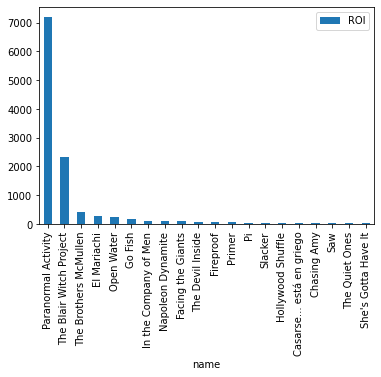

In [54]:
# Find the movie with the highest ROI
# Filter out movies w/o budget data
highest_ROI_df=clean_df.loc[: , ['name', 'ROI']].sort_values('ROI', ascending=False).head(20)
highest_ROI_df.plot(kind='bar', x='name')
# highest_ROI_df

In [55]:
clean_df.loc[df.loc[:, 'name']=='Paranormal Activity', :]

,budget,company,country,director,genre,gross,name,rating,released,runtime,score,star,votes,writer,year,ROI
4683,15000.0,Solana Films,USA,Oren Peli,Horror,107918810.0,Paranormal Activity,R,2009-10-16,86,6.3,Katie Featherston,195668,Oren Peli,2007,7194.587333


In [61]:
clean_df.loc[clean_df.loc[:, 'genre']=='Horror', :]

,budget,company,country,director,genre,gross,name,rating,released,runtime,score,star,votes,writer,year,ROI
39,3000000.0,Paramount Pictures,USA,Tom McLoughlin,Horror,19472057.0,Jason Lives: Friday the 13th Part VI,R,1986-08-01,86,5.9,Thom Mathews,28310,Tom McLoughlin,1986,6.490686
44,4500000.0,Empire Pictures,USA,Stuart Gordon,Horror,1261000.0,From Beyond,R,1986-10-24,86,6.7,Jeffrey Combs,16636,H.P. Lovecraft,1986,0.280222
46,19000000.0,Freddie Fields Productions,USA,Brian Gibson,Horror,40996665.0,Poltergeist II: The Other Side,PG-13,1986-05-23,91,5.7,JoBeth Williams,20669,Mark Victor,1986,2.157719
58,12000000.0,Cannon Pictures,USA,Tobe Hooper,Horror,4884663.0,Invaders from Mars,PG,1986-06-06,100,5.5,Karen Black,5878,Richard Blake,1986,0.407055
88,5000000.0,Paramount Pictures,USA,Fred Walton,Horror,12947763.0,April Fool's Day,R,1986-03-28,89,6.2,Deborah Foreman,11458,Danilo Bach,1986,2.589553
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
6751,1500000.0,Bow and Arrow Entertainment,UK,Rob Zombie,Horror,779820.0,31,R,2016-09-16,102,5.0,Malcolm McDowell,11945,Rob Zombie,2016,0.519880
6769,10000000.0,Gramercy Pictures (I),USA,Jason Zada,Horror,26583369.0,The Forest,PG-13,2016-01-08,93,4.8,Natalie Dormer,30580,Nick Antosca,2016,2.658337
6779,5000000.0,Lionsgate,Canada,Adam Wingard,Horror,20747013.0,La bruja de Blair,R,2016-09-16,89,5.0,James Allen McCune,29715,Simon Barrett,2016,4.149403
6803,5000000.0,IM Global,USA,Brad Peyton,Horror,4790573.0,Incarnate,PG-13,2016-12-02,91,5.2,Aaron Eckhart,7778,Ronnie Christensen,2016,0.958115


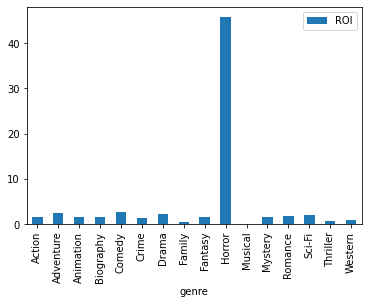

In [58]:
roi_by_genre=clean_df.loc[:, ['ROI', 'genre']].groupby('genre').mean()
roi_by_genre.plot(kind='bar')


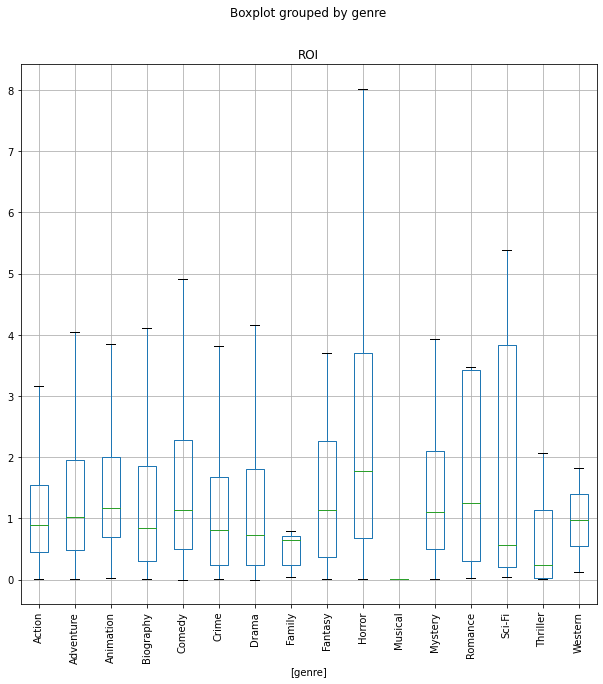

In [74]:
fig, ax=plt.subplots(1, 1, figsize=(10, 10))
clean_df.loc[:, ['ROI', 'genre']].boxplot(by='genre', showfliers=False, rot=90, ax=ax)

In [75]:
clean_df.loc[clean_df.loc[:, 'genre']=='Musical', :]

,budget,company,country,director,genre,gross,name,rating,released,runtime,score,star,votes,writer,year,ROI
2198,10000000.0,Michael Ritchie Productions,USA,Michael Ritchie,Musical,44757.0,The Fantasticks,PG,1995-01-01,86,5.8,Joel Grey,1008,Tom Jones,1995,0.004476


In [80]:
clean_df.loc[:, ['genre', 'year']].groupby('year')['genre'].count()#.plot(kind='bar')

year
1986     89
1987     92
1988    121
1989     97
1990     87
1991    108
1992    119
1993    131
1994    129
1995    136
1996    147
1997    149
1998    151
1999    174
2000    173
2001    174
2002    183
2003    155
2004    168
2005    177
2006    168
2007    170
2008    183
2009    172
2010    166
2011    174
2012    167
2013    166
2014    174
2015    169
2016    169
Name: genre, dtype: int64

In [93]:
year_genre_pvt

genre,Action,Adventure,Animation,Biography,Comedy,Crime,Drama,Family,Fantasy,Horror,Musical,Mystery,Romance,Sci-Fi,Thriller,Western
year,,,,,,,,,,,,,,,,
1986,27.0,12.0,2.0,4.0,25.0,3.0,8.0,NaN,NaN,6.0,NaN,NaN,NaN,1.0,1.0,NaN
1987,27.0,4.0,NaN,5.0,29.0,6.0,12.0,NaN,3.0,5.0,NaN,NaN,NaN,NaN,1.0,NaN
1988,22.0,4.0,3.0,3.0,45.0,7.0,22.0,1.0,3.0,10.0,NaN,NaN,NaN,NaN,1.0,NaN
1989,27.0,12.0,2.0,3.0,28.0,6.0,10.0,1.0,2.0,5.0,NaN,NaN,NaN,1.0,NaN,NaN
1990,29.0,6.0,1.0,NaN,24.0,6.0,11.0,NaN,2.0,5.0,NaN,1.0,NaN,1.0,1.0,NaN
1991,31.0,6.0,2.0,2.0,38.0,10.0,16.0,NaN,NaN,2.0,NaN,1.0,NaN,NaN,NaN,NaN
1992,23.0,9.0,4.0,5.0,30.0,14.0,26.0,NaN,1.0,6.0,NaN,1.0,NaN,NaN,NaN,NaN
1993,27.0,10.0,4.0,6.0,30.0,14.0,30.0,1.0,2.0,6.0,NaN,NaN,NaN,NaN,NaN,1.0
1994,28.0,5.0,4.0,6.0,53.0,12.0,16.0,1.0,2.0,1.0,NaN,1.0,NaN,NaN,NaN,NaN


In [95]:
clean_df.loc[:, ['genre', 'year', 'name']]

,genre,year,name
0,Adventure,1986,Stand by Me
1,Comedy,1986,Ferris Bueller's Day Off
2,Action,1986,Top Gun
3,Action,1986,Aliens
4,Adventure,1986,Flight of the Navigator
5,Drama,1986,Platoon
6,Adventure,1986,Labyrinth
7,Drama,1986,Blue Velvet
8,Comedy,1986,Pretty in Pink
9,Drama,1986,The Fly


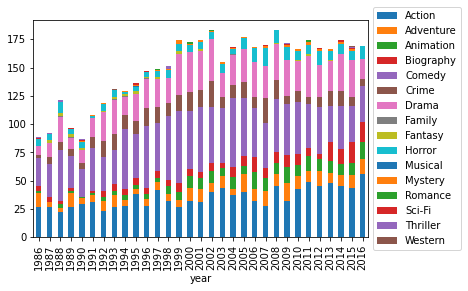

In [92]:
year_genre_pvt=clean_df.loc[:, ['genre', 'year', 'name']].pivot_table(index='year', values='name', columns='genre', aggfunc='count')
year_genre_pvt.plot(kind='bar', stacked=True)
plt.legend(loc='center left', bbox_to_anchor=(1, 0.5))

# some inferences
# more action films over time
# more sci-fi films over time

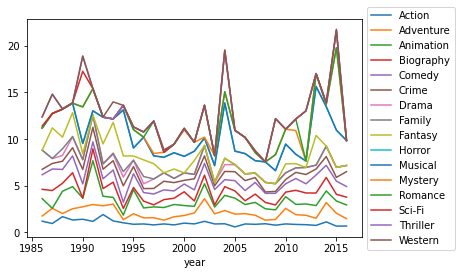

In [91]:
year_genre_roi_pvt=clean_df.loc[:, ['genre', 'year', 'ROI']].pivot_table(index='year', values='ROI', columns='genre', aggfunc='median')
year_genre_roi_pvt.plot(kind='line', stacked=True)
plt.legend(loc='center left', bbox_to_anchor=(1, 0.5))

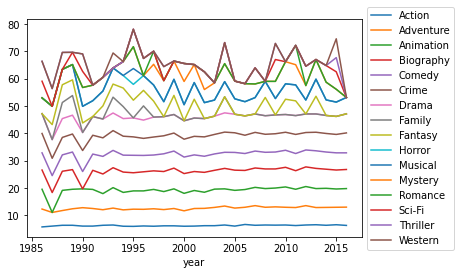

In [96]:
year_genre_score_pvt=clean_df.loc[:, ['genre', 'year', 'score']].pivot_table(index='year', values='score', columns='genre', aggfunc='median')
year_genre_score_pvt.plot(kind='line', stacked=True)
plt.legend(loc='center left', bbox_to_anchor=(1, 0.5))

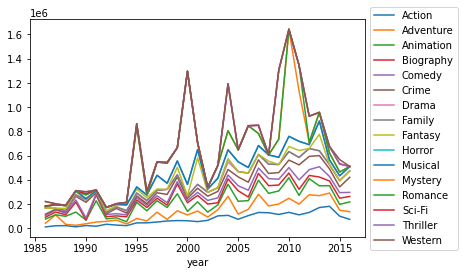

In [97]:
year_genre_score_pvt=clean_df.loc[:, ['genre', 'year', 'votes']].pivot_table(index='year', values='votes', columns='genre', aggfunc='median')
year_genre_score_pvt.plot(kind='line', stacked=True)
plt.legend(loc='center left', bbox_to_anchor=(1, 0.5))

In [98]:
clean_df.head()

,budget,company,country,director,genre,gross,name,rating,released,runtime,score,star,votes,writer,year,ROI
0,8000000.0,Columbia Pictures Corporation,USA,Rob Reiner,Adventure,52287414.0,Stand by Me,R,1986-08-22,89,8.1,Wil Wheaton,299174,Stephen King,1986,6.535927
1,6000000.0,Paramount Pictures,USA,John Hughes,Comedy,70136369.0,Ferris Bueller's Day Off,PG-13,1986-06-11,103,7.8,Matthew Broderick,264740,John Hughes,1986,11.689395
2,15000000.0,Paramount Pictures,USA,Tony Scott,Action,179800601.0,Top Gun,PG,1986-05-16,110,6.9,Tom Cruise,236909,Jim Cash,1986,11.986707
3,18500000.0,Twentieth Century Fox Film Corporation,USA,James Cameron,Action,85160248.0,Aliens,R,1986-07-18,137,8.4,Sigourney Weaver,540152,James Cameron,1986,4.603257
4,9000000.0,Walt Disney Pictures,USA,Randal Kleiser,Adventure,18564613.0,Flight of the Navigator,PG,1986-08-01,90,6.9,Joey Cramer,36636,Mark H. Baker,1986,2.062735


In [108]:
clean_df.loc[:, ['name', 'director']].groupby('director').count().sort_values('name', ascending=False)

,name
director,
Woody Allen,30
Clint Eastwood,24
Steven Soderbergh,21
Steven Spielberg,21
Ron Howard,20
...,...
Jerry Jameson,1
Jerry Belson,1
Jerrold Freedman,1


In [106]:
clean_df.loc[:, ['name', 'star']].groupby('star').count().sort_values('name', ascending=False)

,name
star,
Nicolas Cage,38
Bruce Willis,33
Robert De Niro,32
Denzel Washington,31
Tom Hanks,31
...,...
Jason Behr,1
Jason Beghe,1
Jared Padalecki,1


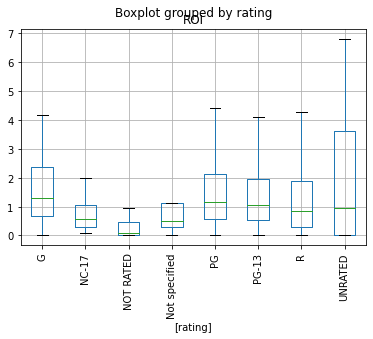

In [115]:
clean_df.loc[:, ['rating', 'ROI']].boxplot(by='rating', showfliers=False, rot=90)

In [118]:
clean_df.loc[:, ['company', 'ROI']].groupby('company').median().sort_values(by='ROI', ascending=False)

,ROI
company,
Solana Films,7194.587333
Haxan Films,2342.318317
Brothers McMullen Productions,409.864000
Plunge Pictures LLC,255.090525
Can I Watch,160.554067
...,...
Lucky Monkey Pictures,0.000185
Middle Fork Productions,0.000179
H2O Motion Pictures,0.000145


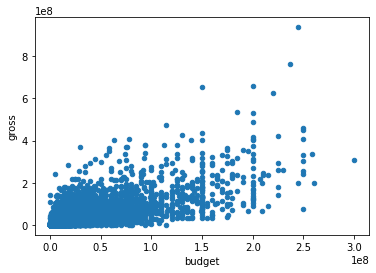

In [121]:
from scipy.stats import linregress
clean_df.loc[:, ['gross', 'budget']].plot(kind='scatter', x='budget', y='gross')

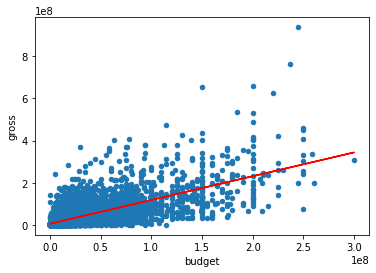

In [124]:
m, b, r, p, std=linregress(clean_df['budget'], clean_df['gross'])
# Y=mX+b
y_predict=m*clean_df['budget']+b
clean_df.loc[:, ['gross', 'budget']].plot(kind='scatter', x='budget', y='gross')
plt.plot(clean_df['budget'], y_predict, c='red')
plt.show()

/usr/local/lib/python3.6/dist-packages/pandas/core/indexing.py:1743: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  isetter(ilocs[0], value)


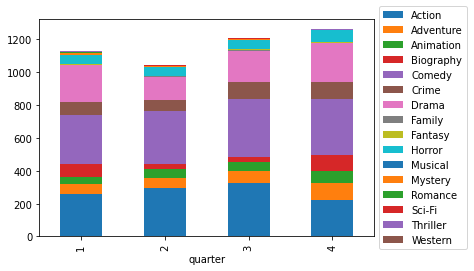

In [159]:
clean_df.loc[:, 'quarter']=clean_df.loc[:, 'released'].dt.quarter
quarter_genre_df=clean_df.loc[:, ['quarter', 'genre', 'name']].pivot_table(values='name', index='quarter', columns='genre', aggfunc='count')
quarter_genre_df.plot(kind='bar', stacked=True)
plt.legend(loc='center left', bbox_to_anchor=(1, 0.5))

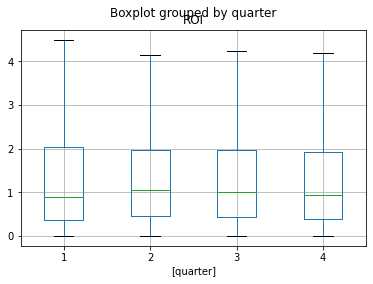

In [139]:
clean_df.loc[:, ['ROI', 'quarter']].boxplot(by='quarter', showfliers=False)

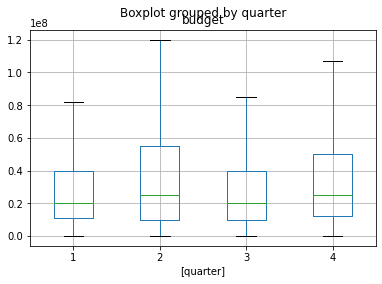

In [141]:
clean_df.loc[:, ['budget', 'quarter']].boxplot(by='quarter', showfliers=False)

In [142]:
clean_df.head()

,budget,company,country,director,genre,gross,name,rating,released,runtime,score,star,votes,writer,year,ROI,quarter
0,8000000.0,Columbia Pictures Corporation,USA,Rob Reiner,Adventure,52287414.0,Stand by Me,R,1986-08-22,89,8.1,Wil Wheaton,299174,Stephen King,1986,6.535927,3
1,6000000.0,Paramount Pictures,USA,John Hughes,Comedy,70136369.0,Ferris Bueller's Day Off,PG-13,1986-06-11,103,7.8,Matthew Broderick,264740,John Hughes,1986,11.689395,2
2,15000000.0,Paramount Pictures,USA,Tony Scott,Action,179800601.0,Top Gun,PG,1986-05-16,110,6.9,Tom Cruise,236909,Jim Cash,1986,11.986707,2
3,18500000.0,Twentieth Century Fox Film Corporation,USA,James Cameron,Action,85160248.0,Aliens,R,1986-07-18,137,8.4,Sigourney Weaver,540152,James Cameron,1986,4.603257,3
4,9000000.0,Walt Disney Pictures,USA,Randal Kleiser,Adventure,18564613.0,Flight of the Navigator,PG,1986-08-01,90,6.9,Joey Cramer,36636,Mark H. Baker,1986,2.062735,3


In [155]:
clean_df.loc[:, ['director', 'ROI']].groupby('director').agg(['median', 'count']).sort_values(('ROI', 'count'), ascending=False)

ROI      
                      median count
director                          
Woody Allen         0.528117    30
Clint Eastwood      1.052290    24
Steven Soderbergh   1.072425    21
Steven Spielberg    1.709355    21
Ron Howard          1.009823    20
...                      ...   ...
Jerry Jameson       1.278834     1
Jerry Belson        0.380798     1
Jerrold Freedman    0.650560     1
Jeremy Leven        0.886018     1
Álex de la Iglesia  0.000361     1

[1892 rows x 2 columns]

In [157]:
clean_df.loc[:, ['star', 'ROI']].groupby('star').agg(['median', 'count']).sort_values(('ROI', 'count'), ascending=False).head(30)

ROI      
                         median count
star                                 
Nicolas Cage           0.645805    38
Bruce Willis           0.732056    33
Robert De Niro         0.685400    32
Denzel Washington      1.202570    31
Tom Hanks              1.807844    31
Johnny Depp            0.894474    30
Tom Cruise             1.334512    27
Adam Sandler           1.412465    27
Ben Stiller            1.201253    25
Eddie Murphy           1.040621    25
Sylvester Stallone     0.850174    25
Kevin Costner          1.124801    24
Keanu Reeves           0.992087    23
Robin Williams         1.232452    22
Brad Pitt              0.925900    22
Matt Damon             1.031210    22
Jim Carrey             1.747958    22
Arnold Schwarzenegger  0.934081    22
George Clooney         1.065615    22
Mark Wahlberg          1.344571    22
Ben Affleck            1.141939    21
Matthew McConaughey    0.717700    21
John Travolta          0.720044    20
Harrison Ford          0.950202    20
Will Smith             1.223059    20
John Cusack            0.827311    20
Mel Gibson             1.530621    20
Sandra Bullock         2.257334    19
Christian Bale         0.635391    19
Jean-Claude Van Damme  1.528763    18